## **Análisis de Tésis de Licenciatura, Maestría y Doctorado en México**

### **Objetivo:**
Analizar la cantidad y tipos de tésis de licenciatura, maestría y doctorado en México, así como detectar posibles tendencias o comportamientos de los estudiantes en cuanto a cantidad y tipos de tésis realizadas.

### **Datos:**
Se cuenta con una base de datos de las tésis realizadas en México desde el año 2015 hasta el 2023 proporcionada por el Centro de Investigaciones Biológicas del Noroeste, S.C (CIBINOR).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math as mth
from scipy import stats as st

In [2]:
tesis = pd.read_csv('C:/Users/mora_/OneDrive/Documentos/Bootcamp Tripleten/Career Prep 30/Mini Proyecto/07_Tesis.csv')
tesis.info()
print()
print(tesis.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662 entries, 0 to 1661
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nivel_estudios  1662 non-null   object 
 1   estudiante      1662 non-null   object 
 2   titulo_tesis    1662 non-null   object 
 3   tutores         1662 non-null   object 
 4   ejercicio       1662 non-null   float64
dtypes: float64(1), object(4)
memory usage: 65.1+ KB

              nivel_estudios                         estudiante  \
0  Tesis de Maestria Interna               Burgoin Cota Marcelo   
1  Tesis de Maestria Interna           Calderon Lievanos Samuel   
2  Tesis de Maestria Interna    Fimbres Acedo Yenitze Elizabeth   
3  Tesis de Maestria Interna  Galaviz Bustamante Maria Cristina   
4  Tesis de Maestria Interna       Garcia Hernandez Diana Edisa   

                                        titulo_tesis                  tutores  \
0  Estudio de la incorporacion de la leva

In [3]:
tesis['ejercicio'] = tesis['ejercicio'].astype('int')
tesis.drop_duplicates(inplace=True)
tesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662 entries, 0 to 1661
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nivel_estudios  1662 non-null   object
 1   estudiante      1662 non-null   object
 2   titulo_tesis    1662 non-null   object
 3   tutores         1662 non-null   object
 4   ejercicio       1662 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 65.1+ KB


**Conclusiones: Limpieza de datos**
- No se observan valores nulos ni valores duplicados, tampoco es necesario renombrar las columnas.
- Se realiza conversión de tipo de datos de la columna 'ejercicio' a tipo 'int' (entero).


In [4]:
tesis_por_nivel = tesis.groupby('nivel_estudios')['nivel_estudios'].count()
print(tesis_por_nivel)
print()
tesis_por_nivel_año = tesis.groupby(['nivel_estudios', 'ejercicio'])['nivel_estudios'].count()
print(tesis_por_nivel_año)

nivel_estudios
Tesis de Doctorado Externa    127
Tesis de Doctorado Interna    573
Tesis de Licenciatura         239
Tesis de Maestria Externa     130
Tesis de Maestria Interna     593
Name: nivel_estudios, dtype: int64

nivel_estudios              ejercicio
Tesis de Doctorado Externa  2016          35
                            2017          40
                            2018          23
                            2019          29
Tesis de Doctorado Interna  2015          16
                            2016         112
                            2017         106
                            2018         106
                            2019          89
                            2020          97
                            2021          17
                            2022          16
                            2023          14
Tesis de Licenciatura       2016          79
                            2017          86
                            2018          36
                     

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Tesis de Doctorado Externa'),
  Text(1, 0, 'Tesis de Doctorado Interna'),
  Text(2, 0, 'Tesis de Licenciatura'),
  Text(3, 0, 'Tesis de Maestria Externa'),
  Text(4, 0, 'Tesis de Maestria Interna')])

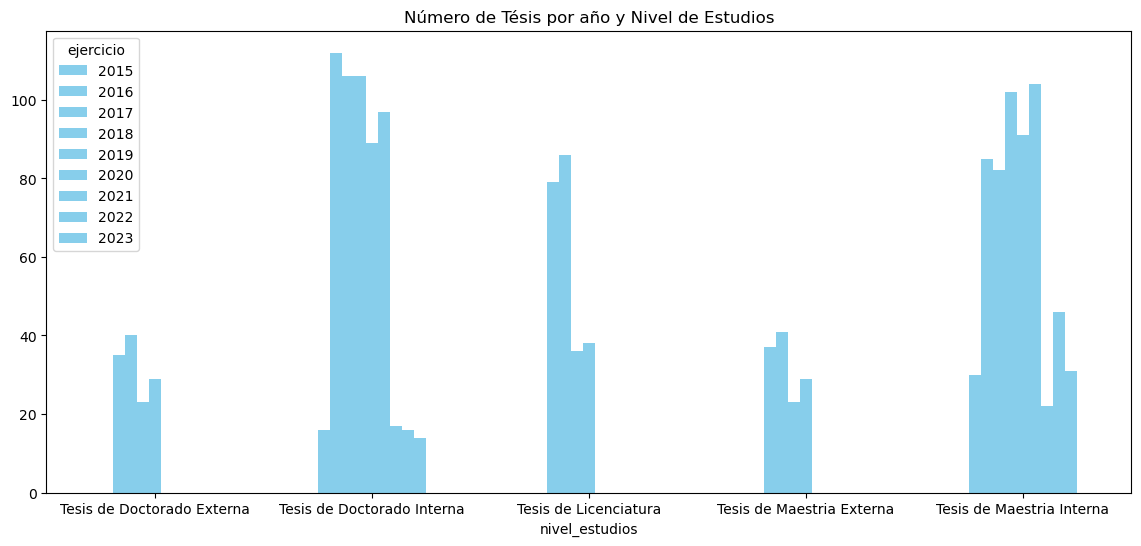

In [5]:
tesis_por_nivel_año.unstack().plot(kind='bar', color='skyblue', figsize=(14,6))
plt.title('Número de Tésis por año y Nivel de Estudios')
plt.xticks(rotation=0)

**Conclusiones: Tésis por Nivel de estudios**

La mayor cantidad de tésis desde el 2015 hasta el 2023 en México, se realizaron para los niveles de "Tésis de Doctorado Interna" (573) y "Tésis de Maestria Interna" (593).

In [6]:
tesis_por_año = tesis.groupby('ejercicio')['ejercicio'].count()
print(tesis_por_año)

ejercicio
2015     46
2016    348
2017    355
2018    290
2019    276
2020    201
2021     39
2022     62
2023     45
Name: ejercicio, dtype: int64


Text(0.5, 1.0, 'Número de Tésis por Año')

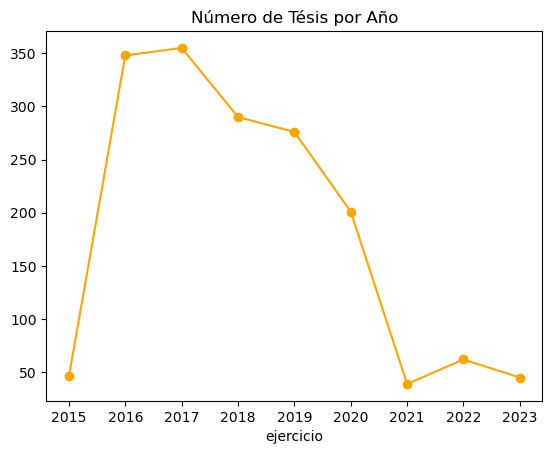

In [7]:
tesis_por_año.plot(kind='line', marker='o', color='orange')
plt.title('Número de Tésis por Año')

**Conclusiones: Tésis por año**

El número de tésis por año se disparó para el año 2016 y se mantuvo en 2017, posteriormente se observa una disminución desde el 2018 hasta el 2021 y finalmente se mantuvo una cantidad baja para el 2022 y 2023.

In [8]:
tesis_por_año_nivel = tesis.groupby(['ejercicio', 'nivel_estudios'])['ejercicio'].count()
print(tesis_por_año_nivel)

ejercicio  nivel_estudios            
2015       Tesis de Doctorado Interna     16
           Tesis de Maestria Interna      30
2016       Tesis de Doctorado Externa     35
           Tesis de Doctorado Interna    112
           Tesis de Licenciatura          79
           Tesis de Maestria Externa      37
           Tesis de Maestria Interna      85
2017       Tesis de Doctorado Externa     40
           Tesis de Doctorado Interna    106
           Tesis de Licenciatura          86
           Tesis de Maestria Externa      41
           Tesis de Maestria Interna      82
2018       Tesis de Doctorado Externa     23
           Tesis de Doctorado Interna    106
           Tesis de Licenciatura          36
           Tesis de Maestria Externa      23
           Tesis de Maestria Interna     102
2019       Tesis de Doctorado Externa     29
           Tesis de Doctorado Interna     89
           Tesis de Licenciatura          38
           Tesis de Maestria Externa      29
           Tesis 

Text(0.5, 1.0, 'Número de Tésis por Año y Nivel de Estudios')

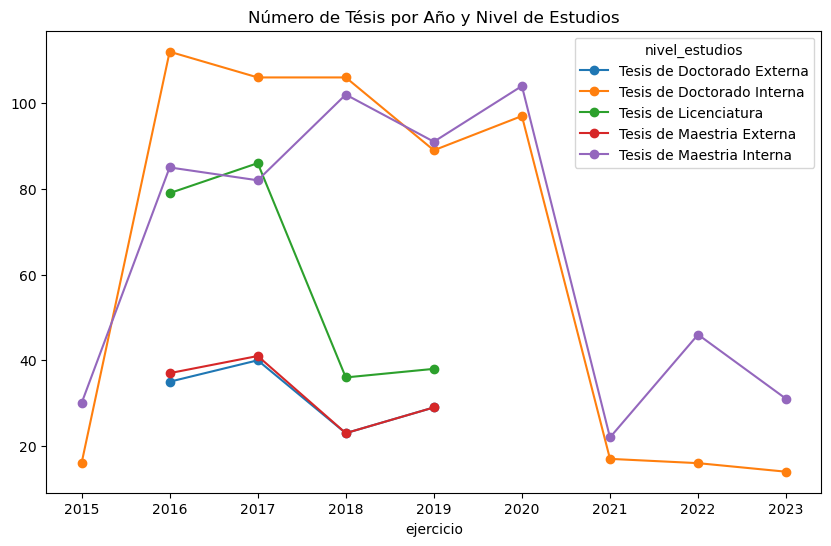

In [9]:
tesis_por_año_nivel.unstack().plot(kind='line', marker='o', figsize=(10,6))
plt.title('Número de Tésis por Año y Nivel de Estudios')

**Conclusiones: Tésis por año y nivel**

Se observa el mismo comportamiento que las tésis por año, dominando las Tésis de doctorado interna y las Tésis de maestría interna al estar presentes en todos los años del estudio.
Las tésis de Licenciatura, Maestría externa y Doctorado Externa, sólo aparecen del 2016 al 2019, superando en estos 4 años las tésis de Licenciatura.

In [10]:
tesis_por_tutor = tesis.groupby('tutores')['tutores'].count().sort_values(ascending=False).head(10)
print(tesis_por_tutor)
print()
print('Tésis promedio por tutor:', tesis_por_tutor.mean().round(0))

tutores
Ortega Rubio, A.            60
Hernandez Montiel, L. G.    47
Angulo Valadez, C. E.       43
Lopez Martinez, J.          43
Rodriguez Estrella, R.      41
Arreola Lizarraga, J. A.    38
Zenteno Savin, T.           32
Balart Paez, E. F.          29
Garcia De Leon, F. J.       27
Alvarez Castaneda, S. T.    25
Name: tutores, dtype: int64

Tésis promedio por tutor: 38.0


Text(0.5, 1.0, 'Top 10 Tutores con Más Tésis')

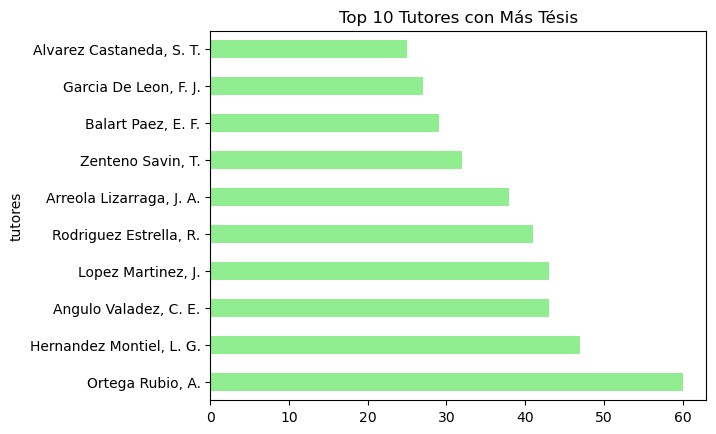

In [11]:
tesis_por_tutor.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Tutores con Más Tésis')

**Conclusiones: Top 10 Tutores con más tesis**

- Se observa que un el tutor Ortega Rubio, A. es el tutor con más tésis tutoradas, el top 10 de tutores va desde 25 hasta 60.
- El promedio de tésis tutoradas por cada tutor, es de 38.

In [12]:
tesis_por_estudiante = tesis.groupby('estudiante')['estudiante'].count().sort_values(ascending=False).head(10)
print(tesis_por_estudiante)
print()
print('Tésis promedio por estudiante:', tesis_por_estudiante.mean().round(0))

estudiante
Hernandez Gurrola Jose Andres        7
Gaxiola Morales Mayra Guadalupe      7
Asencio Alcudia Gloria Gertrudys     7
Garcia Galindo Emilio                6
Garza Avelar Hector Daniel           6
Arredondo Espinoza Roberto Carlos    6
Gauger  Marco Friedrich Walter       6
Leon Lopez Claudia Esmeralda         6
Gomez Gallardo David                 6
Gelippi  Michelle                    6
Name: estudiante, dtype: int64

Tésis promedio por estudiante: 6.0


In [13]:
tesis_por_estudiante_nivel = tesis.groupby(['estudiante', 'nivel_estudios'])['estudiante'].count()
print(tesis_por_estudiante_nivel)
print()
print('Promedio de tésis por nivel por estudiante:', tesis_por_estudiante_nivel.mean().round(0))

estudiante                          nivel_estudios            
Abasolo Pacheco Fernando            Tesis de Doctorado Interna    1
Acevedo Rodriguez Carlos            Tesis de Licenciatura         2
                                    Tesis de Maestria Interna     3
Acosta Fernandez Marcos Ivan        Tesis de Maestria Interna     3
Aguayo Leyva Jesus Eduardo          Tesis de Maestria Interna     3
                                                                 ..
Zavala Hernandez Francisco Refugio  Tesis de Maestria Externa     2
Zayas Alvarez Juan Alfredo          Tesis de Doctorado Externa    1
Zepeda Benitez Viridiana Yalitzin   Tesis de Doctorado Interna    1
Zepeda Leon Aly                     Tesis de Maestria Interna     1
Zumaya Higuera Miriam Guadalupe     Tesis de Maestria Externa     2
Name: estudiante, Length: 801, dtype: int64

Promedio de tésis por nivel por estudiante: 2.0


Text(0.5, 1.0, 'Número de Tésis por Estudiante y Nivel de Estudios')

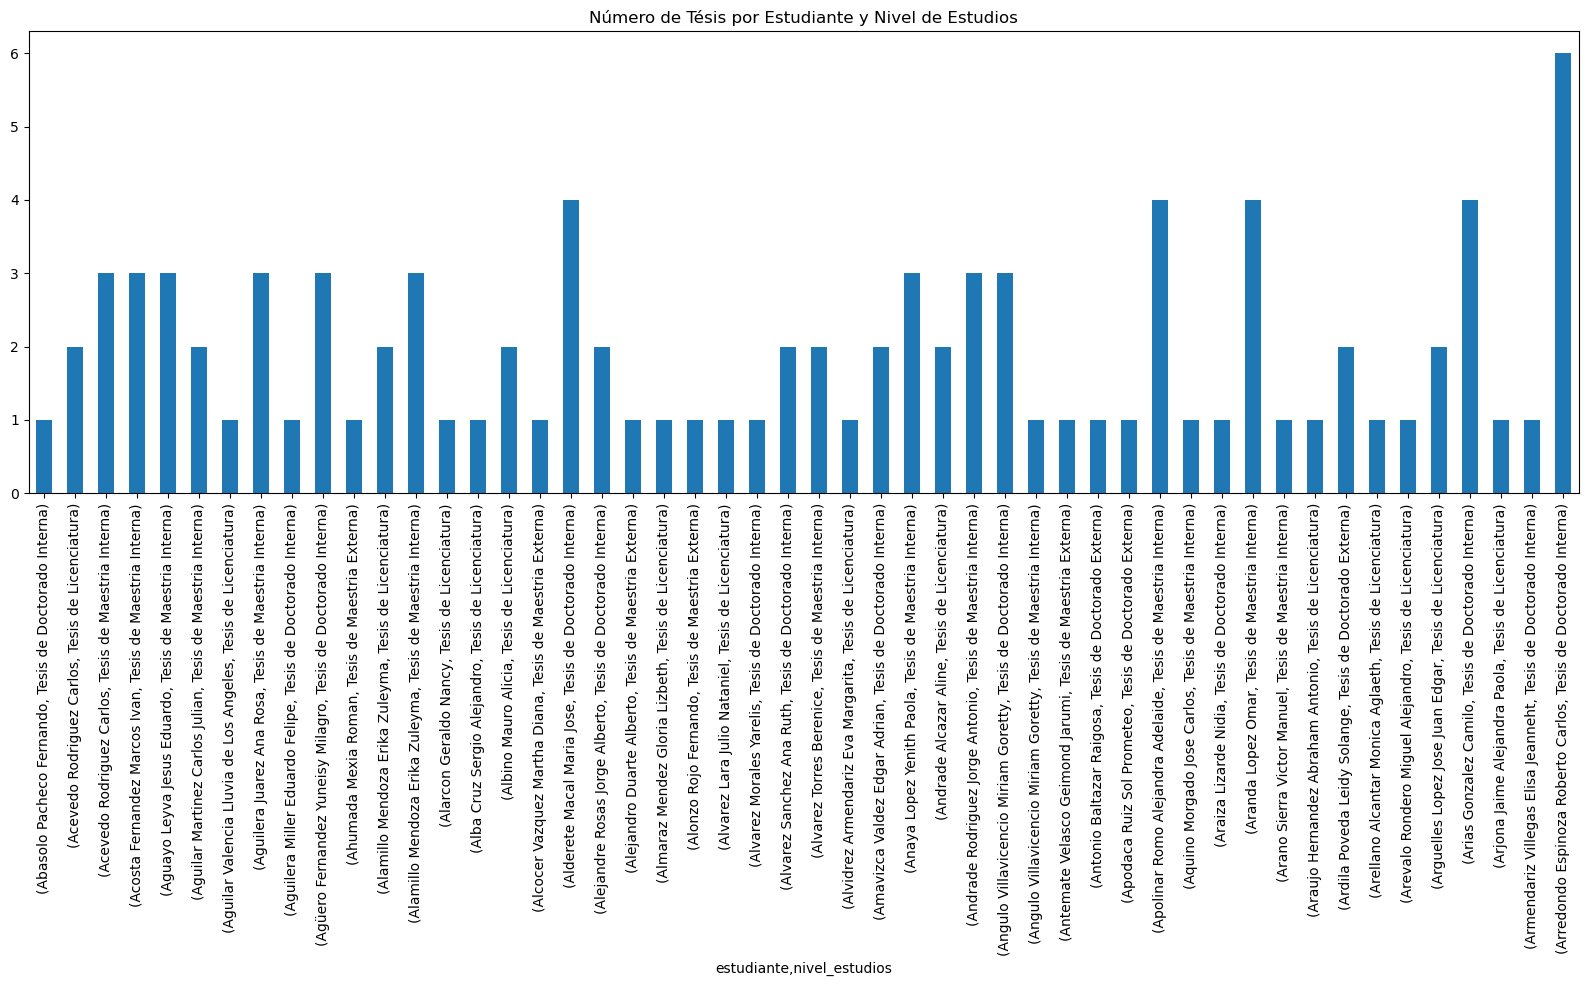

In [14]:
tesis_por_estudiante_nivel.head(50).plot(kind='bar', figsize=(20,6))
plt.title('Número de Tésis por Estudiante y Nivel de Estudios')

**Conclusiones: Tésis por estudiante**

- Generalmente, los estudiantes realizan 6 tésis en promedio.
- Seccionando el análisis por nivel, los estudiantes realizan 2 tésis en promedio.